#Quiz
> 다음 사이트에서 데이터를 다운 받아 최적의 핸드폰 가격 예측 모델을 만드시오
- https://www.kaggle.com/iabhishekofiicial/mobile-price-classification
- 가격은 price_range feature로 판단한다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. 데이터 불러오기

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/10.SVM/data-20210726T052059Z-001/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/10.SVM/data-20210726T052059Z-001/data/test.csv')

In [ ]:
df_train.head(10)
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_test.head(10)
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


#2. 데이터 전처리
> df_train 을 df_data와 label로 나눌 것이다.

In [ ]:
df_data = df_train.drop('price_range', axis=1)
df_label = df_train['price_range']
labels = df_label.values.reshape(-1)
print(labels.mean())
df_data.head()

1.5


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


#3. 데이터 시각화


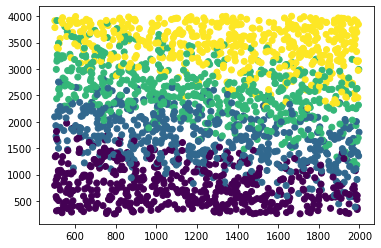

In [ ]:
plt.scatter(np.array(df_data)[:, 12], np.array(df_data)[:, 13], c=labels)
plt.show()

#4. 선형 분류

In [ ]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
accuracy_score(pred, y_test)

0.95

> 왜 이렇게 잘나오지....?

> random_state를 7로 저면 99%의 정확도가 나와서 random_state를 변경한다.


> 비선형으로 진행해보자

In [ ]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
accuracy_score(pred, y_test)

0.9425

> 비선형도 평균 95.5%로 잘 나오지만 선형이 평균97.3%로 더욱 잘나왔다 따라서 선형SVM으로 진행해보자

#5. Scaling

##5.1 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_standard = scaler.fit_transform(df_data)
df_scaled_standard = pd.DataFrame(scaled_standard, columns=df_data.columns)
print(df_scaled_standard.mean())
print(df_scaled_standard.var())
df_scaled_standard.head()

battery_power    2.128298e-16
blue            -1.927347e-16
clock_speed     -2.172151e-16
dual_sim         3.990142e-16
fc               9.230117e-17
four_g          -2.048361e-16
int_memory      -8.754109e-17
m_dep           -1.045830e-16
mobile_wt        1.804112e-16
n_cores         -4.690692e-17
pc               1.669775e-16
px_height        1.287304e-16
px_width         5.595524e-17
ram             -1.582068e-16
sc_h             3.719247e-17
sc_w            -4.085621e-17
talk_time        1.052491e-16
three_g          2.184919e-16
touch_screen     3.065326e-16
wifi             4.278800e-16
dtype: float64
battery_power    1.0005
blue             1.0005
clock_speed      1.0005
dual_sim         1.0005
fc               1.0005
four_g           1.0005
int_memory       1.0005
m_dep            1.0005
mobile_wt        1.0005
n_cores          1.0005
pc               1.0005
px_height        1.0005
px_width         1.0005
ram              1.0005
sc_h             1.0005
sc_w             1.0005
t

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [ ]:
svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(df_scaled_standard, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
accuracy_score(pred, y_test)

0.9525

In [ ]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(df_scaled_standard, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
accuracy_score(pred, y_test)

0.8775

##5.2 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scaled_normal = scale.fit_transform(df_data)
df_scaled_normal = pd.DataFrame(scaled_normal, columns=df_data.columns)
df_scaled_normal.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [ ]:
svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(df_scaled_normal, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
accuracy_score(pred, y_test)

0.9275

In [ ]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(df_scaled_normal, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
accuracy_score(pred, y_test)

0.8725

> 표준화 데이터 >= 원본 데이터 > 정규화 순으로 정확도가 나왔다, 표준화 데이터가 정확하며 연산속도도 빠르기때문에 표준화 데이터로 진행한다.

#6. 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score

# 원본 데이터
svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.2, random_state=123)
score = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
print(score)
print(score.mean())

#표준화 데이터
svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(df_scaled_standard, labels, test_size=0.2, random_state=123)
score = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.975    0.96875  0.975    0.9625   0.978125]
0.971875
[0.965625 0.94375  0.9625   0.959375 0.975   ]
0.9612499999999999


> 교차검증으로 원본 데이터가 정확도가 조금 더 높지만 역시 연산속도가 매우 느리다

#7. 하이퍼 파라미터

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_param_scaled(C_list, data):
  param={
      'C' : C_list
  }
  svm_clf = svm.SVC(kernel='linear')
  X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=123)
  grid_cv = GridSearchCV(svm_clf, param_grid= param, cv=5, verbose=1)
  grid_cv.fit(X_train, y_train)
  df_scores = pd.DataFrame(grid_cv.cv_results_)

  text = '''
  ==================================================
  최고 점수 : {}
  최적의 파라미터 : {}
  ==================================================
  '''.format(grid_cv.best_score_, grid_cv.best_params_)
  print(text)
  return df_scores

##7.1 표준화 데이터

In [ ]:
C_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]

get_best_param_scaled(C_list, df_scaled_standard)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.3s finished



  최고 점수 : 0.96875
  최적의 파라미터 : {'C': 25}
  


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070351,0.002606,0.011055,0.000454,0.001,{'C': 0.001},0.521875,0.503125,0.515625,0.512500,0.509375,0.512500,0.006250,8
1,0.048536,0.001206,0.010911,0.001536,0.01,{'C': 0.01},0.928125,0.865625,0.909375,0.903125,0.878125,0.896875,0.022361,7
2,0.038192,0.003151,0.006517,0.000149,0.1,{'C': 0.1},0.946875,0.934375,0.931250,0.950000,0.934375,0.939375,0.007552,6
3,0.044947,0.003191,0.003633,0.000055,1,{'C': 1},0.965625,0.943750,0.962500,0.959375,0.975000,0.961250,0.010193,5
4,0.091502,0.009267,0.002645,0.000187,10,{'C': 10},0.981250,0.965625,0.962500,0.956250,0.962500,0.965625,0.008385,4
5,0.134227,0.030566,0.002452,0.000324,25,{'C': 25},0.981250,0.971875,0.965625,0.956250,0.968750,0.968750,0.008149,1
6,0.260323,0.063256,0.002131,0.000038,50,{'C': 50},0.978125,0.959375,0.975000,0.953125,0.975000,0.968125,0.009961,2
7,0.534898,0.199127,0.002134,0.000122,100,{'C': 100},0.978125,0.962500,0.971875,0.946875,0.978125,0.967500,0.011792,3


In [ ]:
C_list = list(range(1, 50, 1))

get_best_param_scaled(C_list, df_scaled_standard)

In [ ]:
C_list = list(range(1, 50, 1))

get_best_param_scaled(C_list, df_scaled_standard)

In [ ]:
C_list = []
for i in range(1, 21):
  C_list.append(19 + i/10)

get_best_param_scaled(C_list, df_scaled_standard)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.5s finished



  최고 점수 : 0.9706250000000001
  최적의 파라미터 : {'C': 20.0}
  


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153223,0.032024,0.002416,0.000154,19.1,{'C': 19.1},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
1,0.148879,0.033110,0.002483,0.000423,19.2,{'C': 19.2},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
2,0.154395,0.034543,0.002353,0.000139,19.3,{'C': 19.3},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
3,0.138489,0.032865,0.002433,0.000232,19.4,{'C': 19.4},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
4,0.164917,0.047758,0.002516,0.000426,19.5,{'C': 19.5},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
5,0.163081,0.063625,0.002279,0.000026,19.6,{'C': 19.6},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
6,0.158456,0.069558,0.002247,0.000024,19.7,{'C': 19.7},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
7,0.159205,0.053585,0.002462,0.000432,19.8,{'C': 19.8},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
8,0.162128,0.045775,0.002320,0.000116,19.9,{'C': 19.9},0.984375,0.975,0.965625,0.95625,0.96875,0.970000,0.009396,12
9,0.144094,0.034967,0.002411,0.000118,20,{'C': 20.0},0.984375,0.975,0.968750,0.95625,0.96875,0.970625,0.009186,1


> 최고 점수 : 0.9706250000000001

> 최적의 파라미터 : {'C': 20}

##7.2 원본 데이터

In [ ]:
C_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]

get_best_param_scaled(C_list, df_data)

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02]


In [ ]:
C_list = list(range(1, 21))
for i in range(len(C_list)):
  C_list[i] = C_list[i]/1000
get_best_param_scaled(C_list, df_data)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



  최고 점수 : 0.9775
  최적의 파라미터 : {'C': 0.003}
  


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033899,0.007221,0.002179,0.000433,0.001,{'C': 0.001},0.987500,0.971875,0.984375,0.965625,0.975000,0.976875,0.008053,6
1,0.063982,0.021033,0.002252,0.000400,0.002,{'C': 0.002},0.990625,0.968750,0.984375,0.959375,0.978125,0.976250,0.011110,8
2,0.063213,0.011715,0.001826,0.000040,0.003,{'C': 0.003},0.990625,0.968750,0.984375,0.968750,0.975000,0.977500,0.008705,1
3,0.075775,0.011346,0.001844,0.000075,0.004,{'C': 0.004},0.993750,0.968750,0.984375,0.965625,0.975000,0.977500,0.010346,3
4,0.096386,0.014659,0.002027,0.000274,0.005,{'C': 0.005},0.993750,0.971875,0.984375,0.962500,0.971875,0.976875,0.010933,4
5,0.122686,0.021267,0.001858,0.000092,0.006,{'C': 0.006},0.990625,0.968750,0.981250,0.959375,0.975000,0.975000,0.010643,11
6,0.122319,0.028030,0.001939,0.000205,0.007,{'C': 0.007},0.990625,0.968750,0.981250,0.959375,0.975000,0.975000,0.010643,11
7,0.148104,0.067974,0.001931,0.000128,0.008,{'C': 0.008},0.990625,0.968750,0.981250,0.962500,0.971875,0.975000,0.009882,11
8,0.142649,0.054221,0.001948,0.000190,0.009,{'C': 0.009},0.990625,0.968750,0.984375,0.962500,0.975000,0.976250,0.010193,9
9,0.165853,0.055345,0.001872,0.000128,0.01,{'C': 0.01},0.990625,0.968750,0.981250,0.962500,0.981250,0.976875,0.010000,6


> 최고 점수 : 0.9775
  
> 최적의 파라미터 : {'C': 0.003}

#8. 최적의 모델

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.metrics import accuracy_score

# 표준화 데이터
svm_clf = svm.SVC(kernel='linear', C=20)
X_train, X_test, y_train, Y_test = train_test_split(df_scaled_standard, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9675


In [ ]:
# 원본 데이터
svm_clf = svm.SVC(kernel='linear', C=0.003)
X_train, X_test, y_train, Y_test = train_test_split(df_data, labels, test_size=0.2, random_state=123)

svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9675


============================================================================================

#강사님 코드

##1. 파일 읽기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
train_file = '/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/10.SVM/data-20210726T052059Z-001/data/train.csv'
test_file  = '/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/10.SVM/data-20210726T052059Z-001/data/test.csv'

df_train = pd.read_csv(train_file)
df_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [5]:
df_data = df_train.drop('price_range', axis=1)
df_labels = df_train['price_range']

##2. 선형 모델

###2.1 모델 생성

In [6]:
import sklearn.svm as svm
svm_clf = svm.SVC(kernel='linear')

###2.2 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=62)

###2.3 학습 및 정확도

In [8]:
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9616666666666667

##3. Scaling

###3.1 표준화

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_data)
standard_scaled = scaler.transform(df_data)
standard_scaled[:3]

array([[-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
        -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
        -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
         0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 ,  0.98117712, -0.99289039,
         0.95788598,  1.15502422,  0.68754816, -0.12005944, -0.66476784,
        -0.64598879,  0.58577791,  1.70446468,  0.46731702,  1.11426556,
        -0.63531667, -0.73426721,  0.55964063,  0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 ,  0.98117712, -0.53209893,
         0.95788598,  0.49354568,  1.38116548,  0.13424391,  0.20963905,
        -0.64598879,  1.39268422,  1.07496821,  0.44149774, -0.31017108,
        -0.86492153, -0.36814045,  0.55964063,  0.99401789, -1.01409939]])

In [11]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df_labels, test_size=0.3, random_state=62)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9533333333333334

###3.2 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_data)
normalize_scaled = scaler.transform(df_data)

In [16]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
svm_clf = svm.SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(normalize_scaled, df_labels, test_size=0.3, random_state=62)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.93

##4. 교차검증

###4.1 cross_val_score

In [17]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='linear')

scores = cross_val_score(svm_clf, df_data, df_labels, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.9775 0.9675 0.9675 0.9725 0.98  ]
0.9730000000000001


In [19]:
df_cross = pd.DataFrame(cross_validate(svm_clf, df_data, df_labels, cv=5))
print(df_cross)

    fit_time  score_time  test_score
0  18.335488    0.002148      0.9775
1   9.847065    0.002064      0.9675
2  14.835199    0.002024      0.9675
3  12.856596    0.002124      0.9725
4  17.847524    0.002465      0.9800


In [18]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='linear')

scores = cross_val_score(svm_clf, standard_scaled, df_labels, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.965  0.9475 0.97   0.955  0.96  ]
0.9595


###4.2 하이퍼 파라미터

In [25]:
from sklearn.model_selection import GridSearchCV

svm_clf=svm.SVC(kernel='linear')

def get_best_parameter(cost_list):
  params = {
      'C' : cost_list
  }

  grid_cv = GridSearchCV(svm_clf, param_grid=params, scoring='accuracy', cv=5)
  grid_cv.fit(df_data, df_labels)
  print('Best Score :', grid_cv.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

In [ ]:
cost_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_parameter(cost_list)

KeyboardInterrupt: ignored

##5. 비선형 모델

In [ ]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=62)
svm_clf.fir(X_train, y_train)
svm_clf.score(X_test)

##6. Scaling

###6.1 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_data)
standard_scaled = scaler.transform(df_data)
standard_scaled[:3]

import sklearn.svm as svm
from sklearn.model_selection import train_test_split
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df_labels, test_size=0.3, random_state=62)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

###6.2 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_data)
normalize_scaled = scaler.transform(df_data)

import sklearn.svm as svm
from sklearn.model_selection import train_test_split
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(normalize_scaled, df_labels, test_size=0.3, random_state=62)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

##7. 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='rbf')

scores = cross_val_score(svm_clf, df_data, df_labels, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

In [ ]:
df_cross = pd.DataFrame(cross_validate(svm_clf, df_data, df_labels, cv=5))
print(df_cross)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='rbf')

scores = cross_val_score(svm_clf, standard_scaled, df_labels, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

##8. 하이퍼 파라미터

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_clf=svm.SVC(kernel='rbf')

def get_best_parameter(cost_list, gamma_list):
  params = {
      'C' : cost_list
      'gamma' : gamma_list
  }

  grid_cv = GridSearchCV(svm_clf, param_grid=params, scoring='accuracy', cv=5)
  grid_cv.fit(df_data, df_labels)
  print('Best Score :', grid_df.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

In [ ]:
cost_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
gamma_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_parameter(cost_list, gamma_list)